# Vectorization Exercise

$X = N \times d$ matrix. $w = d$-dimensional vector. 

* $X^{(i)}$ denotes the $i$'th row of the matrix $X$.
* $X_j$ denotes the $j$'th column of the matrix $X$.
* $X^{(i)}_j$ denotes the $j$'th item of $i$'th row of matrix $X$.


$y$ is defined as:

$$y = \frac{1}{N}\sum_{i=1}^N \sum_{j=1}^d w_j X_j^{(i)}$$

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [84]:
X = np.arange(30).reshape(10, 3)  # 10 X 3 matrix
w = np.random.rand(3)  # 3-dimensional vector, considered weight

X, w
print(X.shape)
print(w.shape)

(10, 3)
(3,)


In [85]:
#approaching as the for loop
N = 10
d = 3
sumf = 0
for i in range(N):
    sum = 0
    for j in range(d):
        sum += w[j] * X[i][j]
    sumf += sum
y = (1/N) * sumf
y

26.546980044584416

In [86]:
# second approach N X 1 matrix
N = 10
d = 3
sumf = 0
for i in range(N):
    sum1 = np.dot(X[i],w) #much easier with the dot product
    sumf += sum1
y = (1/N) * sumf
y

26.546980044584416

In [87]:
#Third and final form
y = np.dot(X,w)

print(y.shape)
y.mean()


(10,)


26.546980044584416

## sigmoid function

This is used for logistic regression. Defined as: 
$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

It's derivative is defined as: 
$$
\frac{d}{d\sigma} = \sigma(x)(1-\sigma(x))
$$

In [88]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

0.5


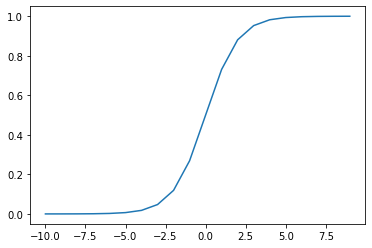

In [89]:
x = np.arange(-10, 10)
plt.plot(x, sigmoid(x))
print(sigmoid(0))

## Data definition

In [90]:
df = pd.read_csv("./titanic/train.csv")

# preprocess some columns
df.fillna(0, inplace=True)
df["Sex"] = df["Sex"] == "male"
df.loc[df["Embarked"] == "S", "Embarked"] = 1
df.loc[df["Embarked"] == "C", "Embarked"] = 2
df.loc[df["Embarked"] == "Q", "Embarked"] = 3
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",True,22.0,1,0,A/5 21171,7.2500,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",False,38.0,1,0,PC 17599,71.2833,C85,2
2,3,1,3,"Heikkinen, Miss. Laina",False,26.0,0,0,STON/O2. 3101282,7.9250,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",False,35.0,1,0,113803,53.1000,C123,1
4,5,0,3,"Allen, Mr. William Henry",True,35.0,0,0,373450,8.0500,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",True,27.0,0,0,211536,13.0000,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",False,19.0,0,0,112053,30.0000,B42,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",False,0.0,1,2,W./C. 6607,23.4500,0,1
889,890,1,1,"Behr, Mr. Karl Howell",True,26.0,0,0,111369,30.0000,C148,2


## Extract Features and Target

In [91]:
#7 types of features that we are using
X = df[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]].to_numpy()

# normalize to -1~1 range
s = MinMaxScaler((-1, 1))
X = s.fit_transform(X)

X.shape

(891, 7)

In [92]:
y = df["Survived"].to_numpy()
y = np.expand_dims(y, axis=1) # use survived 0/1
y.shape

(891, 1)

## Loss term
$$
L_{\theta} = \frac{1}{2N} \sum_{i=1}^N (y_i - \hat{y_i})^2
$$
Where
$$
z = w^T x_i, \quad \hat{y_i} = \sigma(z) \tag{1}
$$

You can get the derivative as:
$$
\frac{dL}{dw} = \frac{dL}{\hat{y_i}}\frac{\hat{y_i}}{d\sigma}\frac{d\sigma}{dz}\frac{dz}{w}
$$

The derivative is calculated as:
$$
\delta(w) = -\frac{dL}{dw} = \frac{1}{N}\sum_{i=1}^N (y_i - \hat{y_i})\hat{y_i}(1 - \hat{y_i}) x_i \tag{2}
$$

Then, update the $w$ as:
$$
w = w + \alpha \delta(w) \tag{3}
$$
where $\alpha$ is the learning rate.

The task is to vectorize above equation.


In [93]:
print(X.shape)
print(y.shape)
z = y*X
print(z.shape)

(891, 7)
(891, 1)
(891, 7)


In [94]:
## Single Layer Neural Network

In [99]:
class model:
    def __init__(self, shape, lr=1):
        self.W = np.random.rand(*shape)
        self.lr = lr
    
    def forward(self, X):
        # Task 1: vectorize forward pass: equation (1) above.
        #X = (891,7), NXd matrix 891 samples
        #W = (7,1), d X 1 matrix 7 features
        #target z = (891,1) 결국 숫자 1로 나타내기
        z = np.dot(X,self.W)
        y_hat = sigmoid(z) #y_hat shape = (891,1)
        return y_hat
    
    def backward(self, X, y, y_hat):
        # Task 2: vectorize backward pass: equation (2) above.
        # y = (891,1) , y^ = (891,1), X = (891,7),  dw should be= (7,1)        
        w1 = ((y-y_hat)*y_hat*(1-y_hat))*X
        w2 = w1.mean(axis = 0)
        dw = w2[:,np.newaxis]
        print(dw.shape)

        #dw.shape = (7,1)
        # update w: equation (3) above.
        # w = w + learning rate * dw
        self.W = self.W + self.lr * dw #scalar product


In [100]:
def mse_loss(y, y_hat):
    return np.mean(np.square(y - y_hat)) / 2

## Training Loop

Loss at epoch 0: 0.18080328073257987
accuracy:  0.31425364758698093

(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
Loss at epoch 10: 0.1896729946163718
accuracy:  2.8540965207631874

(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
Loss at epoch 20: 0.2037072245502066
accuracy:  3.1088664421997754

(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
Loss at epoch 30: 0.21080056574500547
accuracy:  3.2693602693602695

(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
Loss at epoch 40: 0.2146071541851884
accuracy:  3.3905723905723906

(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
Loss at epoch 50: 0.21691122821212244
accuracy:  3.4769921436588103

(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
Loss at epoch 60: 0.21844171347604635
accuracy:  3.536475869809203

(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
Loss at epoch 70: 0.21952909545750807
accuracy:  3.5600448933782265

(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
Loss at epoch 80: 0.22034090587449068
accuracy:  3.5

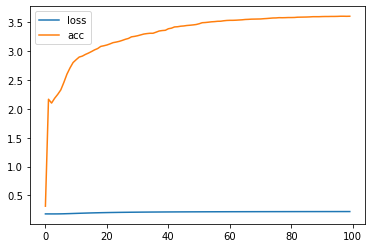

In [101]:
m = model((X.shape[1], 1)) #7,1 bc X is (891,7) and we called 2nd one
loss = []
acc = []
epochs = 100
for i in range(epochs):
    y_hat = m.forward(X)
    pred = y_hat >= 0.5

    loss.append(mse_loss(y, y_hat))
    acc.append(np.count_nonzero(pred == y) / y.shape[0])

    if i % 10 == 0:
        print(f"Loss at epoch {i}: {loss[-1]}")
        print("accuracy: ", acc[-1])
        print()

    m.backward(X, y, y_hat)

plt.plot(loss, label="loss")
plt.plot(acc, label="acc")
plt.legend();

## Prediction Demo

In [102]:
(m.forward(X[:10]) >= 0.5).astype(np.int16), y[:10]

(array([[1, 1, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 0, 0, 1],
        [1, 1, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 0]], dtype=int16),
 array([[0],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1]]))